# Wizualizacja COVID-19
Projekt odnosi się do aktualnego wydarzenia - pandemii COVID-19. Zakłada on odczyt danych z pliku w formacie csv, uporządkowanie ich oraz przeprowadzenie odpowiednich analiz, w celu uzyskania wykresów i wniosków. 

Wykonawcy:
1. Wojciech Strycharczyk, 255713
2. Kacper Równicki, 255949

Trzy najważniejsze aspekty projektu:
1. Użycie biblioteki `DataFrames`,
2. Uporządkowanie, analiza i wizualizacja danych oraz dyskusja wyników,
3. Prezentacja projektu w skoroszycie Jupytera.

## 0. Wprowadzenie
Dane pochodzą ze strony https://ourworldindata.org/coronavirus-data.


In [1]:
#Instalacja kernela, który nie pokazuje ostrzeżeń.
using IJulia
IJulia.installkernel("Julia nodeps", "--depwarn=no")

┌ Info: Installing Julia nodeps kernelspec in C:\Users\stryc\AppData\Roaming\jupyter\kernels\julia-nodeps-1.3
└ @ IJulia C:\Users\stryc\.julia\packages\IJulia\DrVMH\deps\kspec.jl:78


"C:\\Users\\stryc\\AppData\\Roaming\\jupyter\\kernels\\julia-nodeps-1.3"

Zacznijmy od załadowania odpowiednich bibliotek.

In [72]:
using DataFrames
using CSV
using Plots
import Pkg
Pkg.add("Interactive")
using Interactive

pyplot()
#plotly()

  Updating registry at `C:\Users\stryc\.julia\registries\General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 % [======>                                  ]  13.5 %6 %Fetching: [=========================>               ]  61.0 %>           ]  71.4 %Fetching: [====================================>    ]  89.6 %

Pkg.Types.PkgError: The following package names could not be resolved:
 * Interactive (not found in project, manifest or registry)
Please specify by known `name=uuid`.

Możemy rozpocząć pracę. Rozpoczynamy od odczytania `DataFrame`, oraz uzyskania podstawowych informacji o naszych danych.

In [3]:
covid = DataFrame(CSV.File("covid-data.csv")); first(covid, 6)

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths
,String?,String,Dates.D…,Int64,Int64,Int64,Int64
1,ABW,Aruba,2020-03-13,2,2,0,0
2,ABW,Aruba,2020-03-20,4,2,0,0
3,ABW,Aruba,2020-03-24,12,8,0,0
4,ABW,Aruba,2020-03-25,17,5,0,0
5,ABW,Aruba,2020-03-26,19,2,0,0
6,ABW,Aruba,2020-03-27,28,9,0,0


Przyjrzyjmy się wszystkim kolumnom.

In [44]:
for name in names(covid)
    println(name)
end

iso_code
location
date
total_cases
new_cases
total_deaths
new_deaths
total_cases_per_million
new_cases_per_million
total_deaths_per_million
new_deaths_per_million
total_tests
new_tests
total_tests_per_thousand
new_tests_per_thousand
new_tests_smoothed
new_tests_smoothed_per_thousand
tests_units
stringency_index
population
population_density
median_age
aged_65_older
aged_70_older
gdp_per_capita
extreme_poverty
cvd_death_rate
diabetes_prevalence
female_smokers
male_smokers
handwashing_facilities
hospital_beds_per_100k


Zaletą zaimportowanego pliku `.csv` jest dostęp do bardzo specyficznych danych każdego kraju, dzięki czemu możemy poruszyć kilka ciekawych kwestii w tym projekcie.

## 1. Początek

### Wybuch epidemii w Chinach
Epidemia koronawirusa rozpoczęła się na przełomie roku 2019 i 2020. To wtedy, z Chin, zaczynały napływac pierwsze informacje o nowej, nieznanej chorobie. Zobaczmy jak szybko rosła liczba zakażonych COVID-19. 

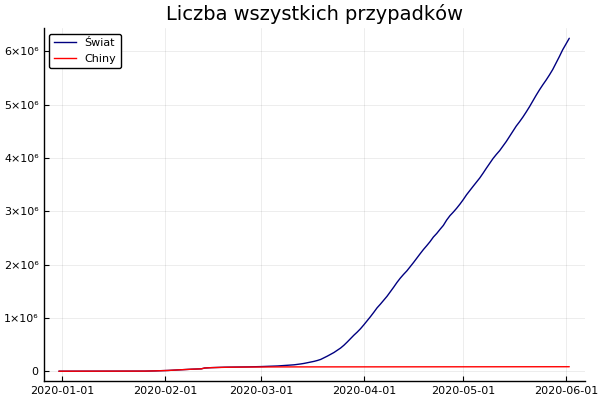

In [68]:
worldwide = covid[covid[:location] .== "World", :]
china = covid[covid[:location] .== "China", :]

plot(worldwide[:date], worldwide[:total_cases], label = "Świat",
                                                title = "Liczba wszystkich przypadków",
                                                color = :navy)

plot!(china[:date], china[:total_cases], label="Chiny", color = :red)

Możemy zauważyć, że do początku marca problem koronawirusa dotyczył niemal tylko i wyłącznie Chin. Dopiero potem liczba chorych zaczęła lawinowo rosnąć na całym świecie. Skalę zjawiska dobrze pokazuje także wykres o **skali logarytmicznej**.

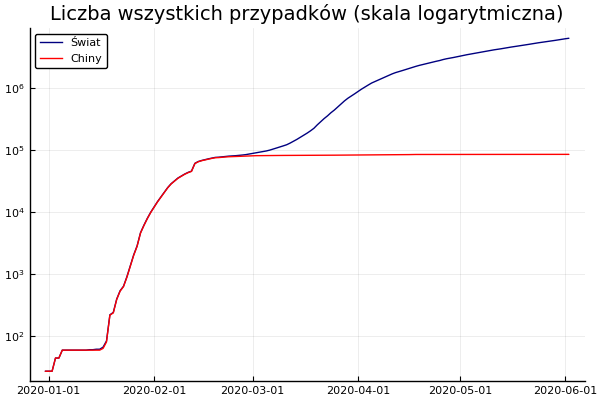

In [67]:
plot(worldwide[:date], worldwide[:total_cases], label = "Świat",
                                                title = "Liczba wszystkich przypadków (skala logarytmiczna)",
                                                color = :navy,
                                                yaxis = :log)

plot!(china[:date], china[:total_cases], label="Chiny",
                                                color = :red,
                                                yaxis = :log)

Można powiedzieć, że epidemia w Chinach zakończyła się na początku marca. Widać to na wykresie słupkowym nowych przypadków. Uwagę przykłuwa aż 15000 przypadków 13 lutego. Było to spowodowane zmianą sposobu klasyfikacji chorych - przed tym dniem za chorych uznawano wyłącznie osoby hospitalizowane. Tamtego dnia zdecydowano się na dopisanie przypadków, które nie wymagały leczenia w szpitalu, a dały pozytywny wynik testu.

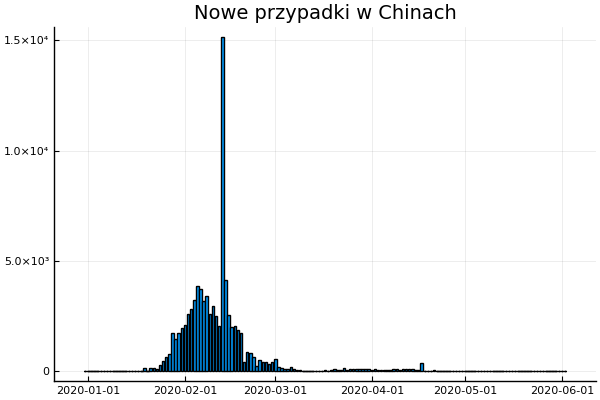

In [66]:
bar(china[:date], china[:new_cases], title="Nowe przypadki w Chinach", label=:none)

### Ogniska zachorowań
Spośród wszystkich krajów, możemy wyróżnić kilka, które mają najwięcej zachorowań.

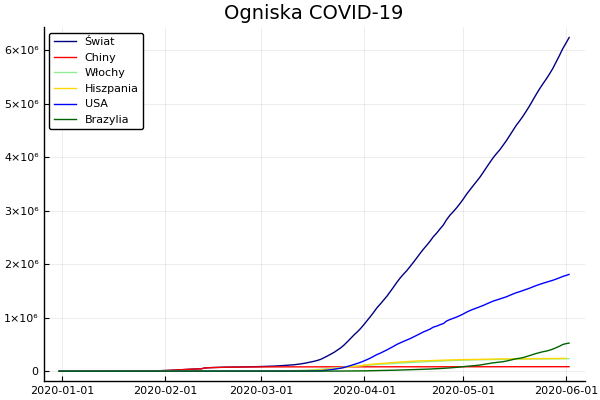

In [65]:
worldwide = covid[covid[:location] .== "World", :]
china = covid[covid[:location] .== "China", :]
italy = covid[covid[:location] .== "Italy", :]
spain = covid[covid[:location] .== "Spain", :]
usa = covid[covid[:location] .== "United States", :]
brazil = covid[covid[:location] .== "Brazil", :]

plot(worldwide[:date], worldwide[:total_cases], label = "Świat",
                                                title = "Ogniska COVID-19",
                                                color = :navy)

plot!(china[:date], china[:total_cases], label="Chiny", color = :red)
plot!(italy[:date], italy[:total_cases], label="Włochy", color = :lightgreen)
plot!(spain[:date], spain[:total_cases], label="Hiszpania", color = :gold)
plot!(usa[:date], usa[:total_cases], label="USA", color = :blue)
plot!(brazil[:date], brazil[:total_cases], label="Brazylia", color = :darkgreen)


## ?. Przypadek Włoch - czy wiek gra rolę?
Na początku epidemii, wielu z nas zadawało sobie pytanie dlaczego we Włoszech aż tak dynamicznie rosła liczba nowych zakażeń. Pojawiła się teza, że wpływ na to może mieć wiek Włochów, wszak to najstarsze społeczeństwo w Europie.

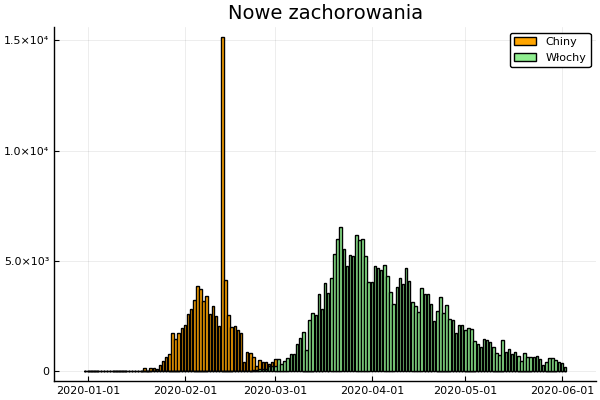

In [32]:
bar(china[:date], china[:new_cases], label="Chiny", color=:orange)
bar!(italy[:date], italy[:new_cases], title="Nowe zachorowania", label="Włochy", color=:lightgreen)

In [33]:
age = covid[:, [:location, :median_age, :aged_65_older, :aged_70_older]] |> unique |> dropmissing

median_sorted = sort!(age, :median_age, rev=true)

,location,median_age,aged_65_older,aged_70_older
,String,Float64,Float64,Float64
1,Japan,48.2,27.049,18.493
2,Italy,47.9,23.021,16.24
3,Germany,46.6,21.453,15.957
4,Portugal,46.2,21.502,14.924
5,Spain,45.5,19.436,13.799
6,Greece,45.3,20.396,14.524
7,Hong Kong,44.8,16.303,10.158
8,Bulgaria,44.7,20.801,13.272
9,Slovenia,44.5,19.062,12.93


Przyjrzyjmy się krajom, które miały najstarsze społeczeństwa.

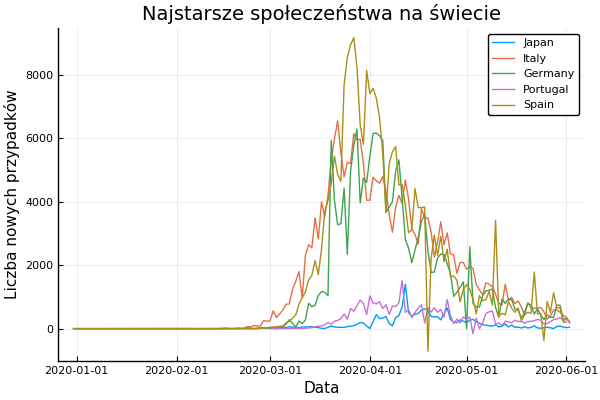

In [58]:
p = plot(title = "Najstarsze społeczeństwa na świecie", xlabel = "Data", ylabel = "Liczba nowych przypadków")
for country in ["Japan", "Italy", "Germany", "Portugal", "Spain"]
    df = covid[covid[:location] .== country, :]
    plot!(df[:date], df[:new_cases], label=country)
end

p

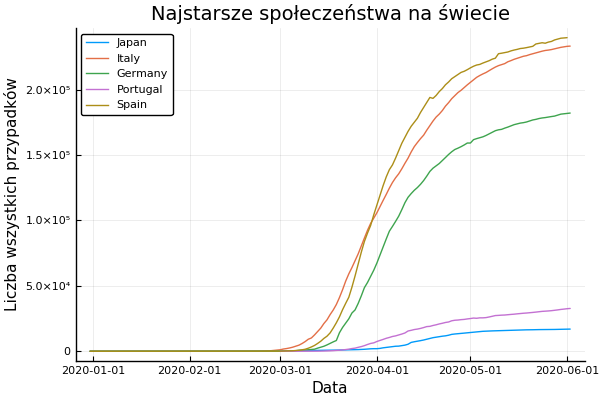

In [57]:
p = plot(title = "Najstarsze społeczeństwa na świecie", xlabel = "Data", ylabel = "Liczba wszystkich przypadków")
for country in ["Japan", "Italy", "Germany", "Portugal", "Spain"]
    df = covid[covid[:location] .== country, :]
    plot!(df[:date], df[:total_cases], label=country)
end

p 

Pomimo starego społeczeństwa, Portugalia i Japonia nie zanotowały tak drastycznych wzrosrów, jak Niemcy, Hiszpania czy Włochy. Zatem nie wydaje się, żeby to wiek był decydującym czynnikiem w tempie rozwoju epidemii.

Inną hipotezą był styl życia Włochów. Mieszkańcy krajów śródziemnomorskich znani są ze specyficznego, otwartego stylu życia. O ile nasze dane nie pozwalają sprawdzić, ilu Włochów chodzi do restauracji, możemy zbadać czy wpływ na to miało palenie papierosów.

In [49]:
cigarettes = covid[:, [:location, :male_smokers, :female_smokers]] |> unique |> dropmissing

cigarettes_sorted = sort!(cigarettes, [:male_smokers, :female_smokers], rev=true) |> display

cigarettes[cigarettes[:location] .== ["Italy", ], :]

,location,male_smokers,female_smokers
,String,Float64,Float64
1,Timor,78.1,6.3
2,Indonesia,76.1,2.8
3,Tunisia,65.8,1.1
4,Russia,58.3,23.4
5,Georgia,55.5,5.3
6,Maldives,55.0,2.1
7,Lesotho,53.9,0.4
8,Cuba,53.3,17.1
9,Cyprus,52.7,19.6


,location,male_smokers,female_smokers
,String,Float64,Float64
1,Italy,27.8,19.8


W czołówce krajów palących najwięcej papierosów, prózno szukać jednak Włochów. Zajmują oni dość odległe miejsce w tej rywalizacji. Po przyjrzeniu się krzywym zachorowań, tylko w Rosji widać znaczącą liczbę chorych. Jako, że niektóre z tych państw są małe, użyjemy wskaźnika liczby przypadków na milion mieszkańców.

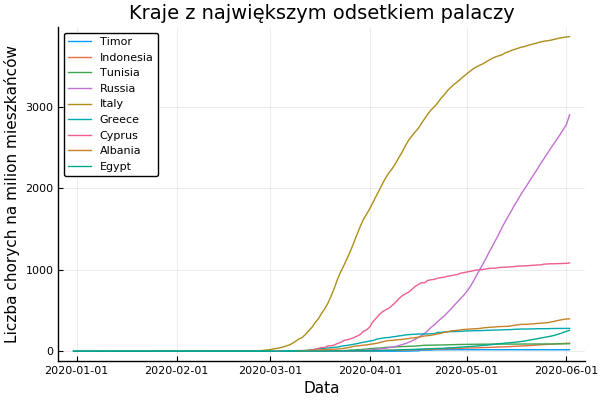

In [63]:
p = plot(title = "Kraje z największym odsetkiem palaczy", xlabel = "Data", ylabel = "Liczba chorych na milion mieszkańców")
for country in ["Timor", "Indonesia", "Tunisia", "Russia", "Italy", "Greece", "Cyprus", "Albania", "Egypt"]
    df = covid[covid[:location] .== country, :]
    plot!(df[:date], df[:total_cases_per_million], label=country)
end

p

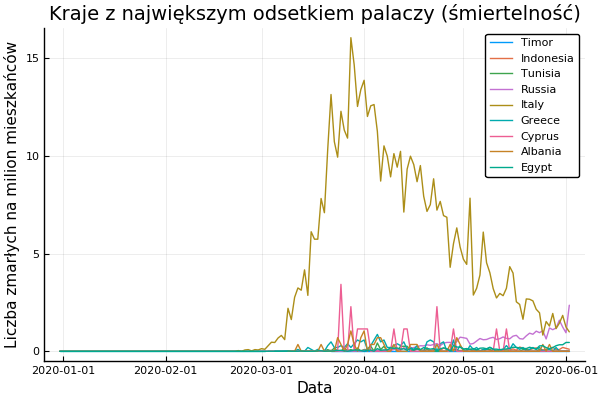

In [64]:
p = plot(title = "Kraje z największym odsetkiem palaczy (śmiertelność)", xlabel = "Data", ylabel = "Liczba zmarłych na milion mieszkańców")
for country in ["Timor", "Indonesia", "Tunisia", "Russia", "Italy", "Greece", "Cyprus", "Albania", "Egypt"]
    df = covid[covid[:location] .== country, :]
    plot!(df[:date], df[:new_deaths_per_million], label=country)
end

p

Ponownie nie widać zależności. Poza Rosją i Cyprem, pozostałe kraje nie notowały dużych przyrostów, choć epidamia startowała we wszystkich w podobnym czasie. We Włoszech, z kolei, chorych było znacznie więcej. Podobnie, ilość palaczy nie powoduje znacząco większej śmiertelności wśród chorych.

Wobec tego ciężko jednoznacznie stwierdzić, dlaczego to akurat we Włoszech sytuacja była aż tak poważna. Może wynikało to z postawy Włochów lub ze środków podjętych przez rząd, lecz nie można dowieść, że to wiek i palenie papierosów przyczyniło się do zwiększenia tempa COVID-19.

## . Testowanie / COVID - PKB / Stan służby zdrowia a walka z pandemią.
